In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets==1.0.2
!pip install tqdm==4.57.0

In [ ]:
!mkdir '/content/drive/My Drive/t5'
!mkdir '/content/drive/My Drive/t5/dataset'
!mkdir '/content/drive/My Drive/t5/model'
!mkdir '/content/drive/My Drive/t5/tokenizer'
!ls

mkdir: cannot create directory ‘/content/drive/My Drive/t5’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/t5/dataset’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/t5/model’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/t5/tokenizer’: File exists
drive  sample_data


In [ ]:
from datasets import load_dataset
train_dataset = load_dataset('squad', split='train')
test_dataset = load_dataset('squad', split='validation')

Reusing dataset squad (/root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41)
Reusing dataset squad (/root/.cache/huggingface/datasets/squad/plain_text/1.0.0/1244d044b266a5e4dbd4174d23cb995eead372fbca31a03edc3f8a132787af41)


In [ ]:
import pandas as pd
df = pd.DataFrame(train_dataset)
df.head()

,answers,context,id,question,title
0,"{'answer_start': [515], 'text': ['Saint Bernad...","Architecturally, the school has a Catholic cha...",5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,University_of_Notre_Dame
1,"{'answer_start': [188], 'text': ['a copper sta...","Architecturally, the school has a Catholic cha...",5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,University_of_Notre_Dame
2,"{'answer_start': [279], 'text': ['the Main Bui...","Architecturally, the school has a Catholic cha...",5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,University_of_Notre_Dame
3,"{'answer_start': [381], 'text': ['a Marian pla...","Architecturally, the school has a Catholic cha...",5733be284776f41900661181,What is the Grotto at Notre Dame?,University_of_Notre_Dame
4,"{'answer_start': [92], 'text': ['a golden stat...","Architecturally, the school has a Catholic cha...",5733be284776f4190066117e,What sits on top of the Main Building at Notre...,University_of_Notre_Dame


In [ ]:
# Install pandas and spacy
!pip install pandas
!pip install spacy

# Download the English model for spaCy
!python -m spacy download en_core_web_sm


2024-04-15 07:50:38.922065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 07:50:38.922186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 07:50:38.926756: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstalled en-core-web-sm-3.7.1
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')

In [ ]:
import pandas as pd
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_features(docs):
    features_list = []
    for doc in docs:
        features = [{
            'text': token.text,
            'lemma': token.lemma_,
            'pos': token.pos_,
            'dep': token.dep_,
            'head_text': token.head.text,
            'head_pos': token.head.pos_
        } for token in doc]
        features_list.append(features)
    return features_list

In [ ]:
import pandas as pd
import spacy

# Load spaCy model (choose the appropriate model for your language)
nlp = spacy.load('en_core_web_sm')

def extract_features(docs):
    features_list = []
    for doc in docs:
        features = [{
            'text': token.text,
            'lemma': token.lemma_,
            'pos': token.pos_,
            'dep': token.dep_,
            'head_text': token.head.text,
            'head_pos': token.head.pos_
        } for token in doc]
        features_list.append(features)
    return features_list

# Load your DataFrame (this is just a placeholder line)
# df = pd.read_json('path_to_your_dataframe.json')

# Assuming df is your DataFrame where each row contains a 'context' column
# You can slice the DataFrame to process only a subset (e.g., first 10 rows)
subset_df = df.head(10)  # Process only the first 10 rows for demonstration

# Using nlp.pipe() to process texts in batches
texts = subset_df['context'].astype(str).tolist()
docs = list(nlp.pipe(texts, disable=["ner"]))  # Disable NER if it's not needed to speed up the processing

# Extract features
subset_df['features'] = extract_features(docs)

# Now subset_df contains the original columns plus a new 'features' column with extracted features
# You can inspect subset_df or further process it as needed



<ipython-input-25-fbbeeba5c14b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['features'] = extract_features(docs)


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
subset_df['features']

0                                                                                                                                                                                                                                                                                                                                [{'text': 'Architecturally', 'lemma': 'architecturally', 'pos': 'ADV', 'dep': 'advmod', 'head_text': 'has', 'head_pos': 'VERB'}, {'text': ',', 'lemma': ',', 'pos': 'PUNCT', 'dep': 'punct', 'head_text': 'has', 'head_pos': 'VERB'}, {'text': 'the', 'lemma': 'the', 'pos': 'DET', 'dep': 'det', 'head_text': 'school', 'head_pos': 'NOUN'}, {'text': 'school', 'lemma': 'school', 'pos': 'NOUN', 'dep': 'nsubj', 'head_text': 'has', 'head_pos': 'VERB'}, {'text': 'has', 'lemma': 'have', 'pos': 'VERB', 'dep': 'ROOT', 'head_text': 'has', 'head_pos': 'VERB'}, {'text': 'a', 'lemma': 'a', 'pos': 'DET', 'dep': 'det', 'head_text': 'character', 'head_pos': 'NOUN'}, {'text': 'Catholic', 'lemma'

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Input text
text = "Vitamin C is an essential nutrient for certain animals including humans. The term vitamin C encompasses several vitamers that have vitamin C activity in animals. Ascorbate salts such as sodium ascorbate and calcium ascorbate are used in some dietary supplements. These release ascorbate upon digestion. Ascorbate and ascorbic acid are both naturally present in the body when either of these is introduced into cells, since the forms interconvert according to pH."

# Process the text with spaCy
doc = nlp(text)

# POS tagging
print("POS tagging:")
for token in doc:
    print(f"{token.text}: {token.pos_}")

# Dependency parsing
print("\nDependency parsing:")
for token in doc:
    print(f"{token.text}: {token.dep_} -> {token.head.text}")


POS tagging:
Vitamin: NOUN
C: PROPN
is: AUX
an: DET
essential: ADJ
nutrient: NOUN
for: ADP
certain: ADJ
animals: NOUN
including: VERB
humans: NOUN
.: PUNCT
The: DET
term: NOUN
vitamin: NOUN
C: NOUN
encompasses: VERB
several: ADJ
vitamers: NOUN
that: PRON
have: VERB
vitamin: NOUN
C: NOUN
activity: NOUN
in: ADP
animals: NOUN
.: PUNCT
Ascorbate: ADJ
salts: NOUN
such: ADJ
as: ADP
sodium: NOUN
ascorbate: ADJ
and: CCONJ
calcium: NOUN
ascorbate: NOUN
are: AUX
used: VERB
in: ADP
some: DET
dietary: ADJ
supplements: NOUN
.: PUNCT
These: DET
release: NOUN
ascorbate: ADJ
upon: SCONJ
digestion: NOUN
.: PUNCT
Ascorbate: ADJ
and: CCONJ
ascorbic: NOUN
acid: NOUN
are: AUX
both: PRON
naturally: ADV
present: ADJ
in: ADP
the: DET
body: NOUN
when: SCONJ
either: PRON
of: ADP
these: PRON
is: AUX
introduced: VERB
into: ADP
cells: NOUN
,: PUNCT
since: SCONJ
the: DET
forms: NOUN
interconvert: NOUN
according: VERB
to: ADP
pH.: NOUN

Dependency parsing:
Vitamin: compound -> C
C: nsubj -> is
is: ROOT -> is
an: det

In [ ]:
for token in doc:
    if token.dep_ == 'ROOT':  # Identifying the main verb
        for child in token.children:
            if child.dep_ == 'dobj':  # Direct object of the verb
                question = text.replace(child.text, '_______')
                print(f"Question: What did {token.text} {question}?")
                print(f"Answer: {child.text}")
                break

Question: What did encompasses Vitamin C is an essential nutrient for certain animals including humans. The term vitamin C encompasses several _______ that have vitamin C activity in animals. Ascorbate salts such as sodium ascorbate and calcium ascorbate are used in some dietary supplements. These release ascorbate upon digestion. Ascorbate and ascorbic acid are both naturally present in the body when either of these is introduced into cells, since the forms interconvert according to pH.?
Answer: vitamers


In [ ]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Sample text
text = "Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend 'Venite Ad Me Omnes'. Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary."

# Process the text with spaCy
doc = nlp(text)

# Extract tokens with POS tags and dependency parsing
parsed_data = []
for token in doc:
    parsed_data.append((token.text, token.pos_, token.dep_, token.head.text))

# Display tokens with POS tags and dependency parsing
for token in parsed_data:
    print(token)


('Architecturally', 'ADV', 'advmod', 'has')
(',', 'PUNCT', 'punct', 'has')
('the', 'DET', 'det', 'school')
('school', 'NOUN', 'nsubj', 'has')
('has', 'VERB', 'ROOT', 'has')
('a', 'DET', 'det', 'character')
('Catholic', 'ADJ', 'amod', 'character')
('character', 'NOUN', 'dobj', 'has')
('.', 'PUNCT', 'punct', 'has')
('Atop', 'ADP', 'prep', 'is')
('the', 'DET', 'det', 'Building')
('Main', 'PROPN', 'compound', 'Building')
('Building', 'PROPN', 'poss', 'dome')
("'s", 'PART', 'case', 'Building')
('gold', 'NOUN', 'compound', 'dome')
('dome', 'NOUN', 'pobj', 'Atop')
('is', 'AUX', 'ROOT', 'is')
('a', 'DET', 'det', 'statue')
('golden', 'ADJ', 'amod', 'statue')
('statue', 'NOUN', 'attr', 'is')
('of', 'ADP', 'prep', 'statue')
('the', 'DET', 'det', 'Mary')
('Virgin', 'PROPN', 'compound', 'Mary')
('Mary', 'PROPN', 'pobj', 'of')
('.', 'PUNCT', 'punct', 'is')
('Immediately', 'ADV', 'advmod', 'is')
('in', 'ADP', 'prep', 'is')
('front', 'NOUN', 'pobj', 'in')
('of', 'ADP', 'prep', 'front')
('the', 'DET', 

In [ ]:
import string

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using translation method
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

# Sample text
text = "Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary."

# Perform lexical preprocessing
cleaned_text = preprocess_text(text)

print("Cleaned Text:")
print(cleaned_text)

Cleaned Text:
architecturally the school has a catholic character atop the main buildings gold dome is a golden statue of the virgin mary


In [ ]:
import spacy

# Load the English NLP model
nlp = spacy.load('en_core_web_sm')

# Sample text
text = "Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend 'Venite Ad Me Omnes'. Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary."

# Process the text with spaCy
doc = nlp(cleaned_text)

# Extract tokens with POS tags and dependency parsing
parsed_data = [(token.text, token.pos_, token.dep_, token.head.text) for token in doc]

# Function to generate MCQs based on parsed data
def generate_mcq_questions(parsed_data):
    mcq_questions = []

    # Iterate over the parsed data to identify patterns and generate questions
    for i in range(len(parsed_data)):
        token = parsed_data[i]
        word = token[0]
        pos_tag = token[1]
        dep_tag = token[2]
        head_word = token[3]

        # Generate questions based on specific patterns
        if pos_tag == 'NOUN' and dep_tag == 'nsubj':
            # Question about the subject of a verb
            question = f"What has a '{word}'?"
            mcq_questions.append(question)

        if pos_tag == 'NOUN' and dep_tag == 'pobj':
            # Question about the object of a preposition
            question = f"What is located next to the '{word}'?"
            mcq_questions.append(question)

        if pos_tag == 'NOUN' and dep_tag == 'attr' and head_word == 'is':
            # Question about the attribute of a subject
            question = f"What is '{head_word}'?"
            mcq_questions.append(question)

    return mcq_questions

# Generate MCQ questions from parsed data
mcq_questions_generated = generate_mcq_questions(parsed_data)

# Display generated MCQ questions
for i, question in enumerate(mcq_questions_generated):
    print(f"MCQ {i+1}: {question}")


MCQ 1: What has a 'school'?
MCQ 2: What is located next to the 'buildings'?
MCQ 3: What is located next to the 'dome'?
MCQ 4: What is 'is'?


In [ ]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Input text paragraph
text = "The history of India is a tapestry woven with threads of ancient civilizations, cultural diversity, and a rich heritage that spans several millennia. Home to one of the world's oldest civilizations, the Indus Valley Civilization, which flourished around 3300–1300 BCE, India has witnessed the rise and fall of numerous empires and dynasties. The Aryan migration around 1500 BCE brought new languages and cultural elements to the subcontinent. Over the centuries, powerful empires, such as the Maurya and Gupta Empires, left indelible marks on India's cultural and political landscape. The advent of Buddhism and Jainism in the 6th century BCE added spiritual dimensions to the region. In the medieval period, the Delhi Sultanate and the Mughal Empire played pivotal roles, shaping art, architecture, and governance. The 18th-century arrival of European powers, primarily the British East India Company, marked a significant chapter, leading to colonial rule and the struggle for independence. India finally gained its freedom in 1947, becoming a sovereign republic. The post-independence era saw the country navigating challenges, embracing democracy, and achieving economic growth. Today, India stands as a vibrant nation, blending ancient traditions with modern aspirations, embodying a kaleidoscope of cultures, languages, and religions."

# Process the text with SpaCy
doc = nlp(text)

# Extract POS tags and dependency parsing
pos_tags = [(token.text, token.pos_) for token in doc]
dependency_parse = [(token.text, token.dep_, token.head.text) for token in doc]

# Helper function to generate meaningful questions
def generate_questions(pos_tags, dependency_parse):
    questions = []

    # Look for relevant patterns in the POS tags and dependency parsing
    for i in range(len(pos_tags)):
        token, pos_tag = pos_tags[i]
        if pos_tag in ["NOUN", "PROPN"]:  # Consider nouns and proper nouns
            # Generate questions based on dependency parsing
            if dependency_parse[i][1] == "nsubj":  # Subject of a verb
                question = f"What {dependency_parse[i][2]} {token}?"
                questions.append(question)
            elif dependency_parse[i][1] == "pobj":  # Object of a preposition
                question = f"What is {token} a {dependency_parse[i][2]} of?"
                questions.append(question)

    return questions

# Generate meaningful questions
generated_questions = generate_questions(pos_tags, dependency_parse)

# Print generated questions
print("Generated Questions:")
for question in generated_questions:
    print(question)

Generated Questions:
What is history?
What is India a of of?
What is threads a with of?
What is civilizations a of of?
What is civilizations a of of?
What witnessed Civilization?
What witnessed India?
What is empires a of of?
What brought migration?
What is BCE a around of?
What is subcontinent a to of?
What is centuries a Over of?
What left empires?
What is Empires a as of?
What is landscape a on of?
What added advent?
What is Buddhism a of of?
What is century a in of?
What added BCE?
What is region a to of?
What is period a In of?
What played Sultanate?
What marked arrival?
What is powers a of of?
What is rule a to of?
What is independence a for of?
What gained India?
What saw era?
What navigating country?
What stands India?
What is nation a as of?
What is aspirations a with of?
What is cultures a of of?


In [ ]:
!pip install nltk


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Input text
text = "The quick brown fox jumps over the lazy dog."

# Tokenize the text
tokens = word_tokenize(text)

# Perform POS tagging
tagged_tokens = nltk.pos_tag(tokens)

# Print tagged tokens
print(tagged_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


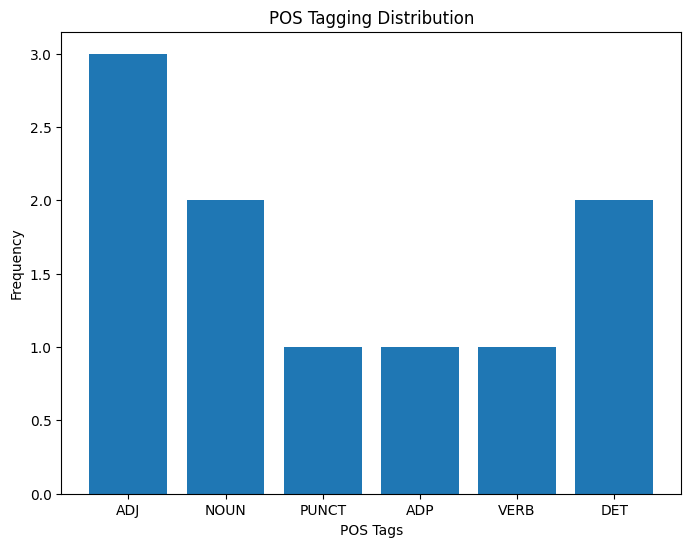

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Your sample text
text = "The quick brown fox jumps over the lazy dog."

# Process the text
doc = nlp(text)

# Extract POS tags and frequencies
pos_tags = [token.pos_ for token in doc]
pos_tag_counts = {tag: pos_tags.count(tag) for tag in set(pos_tags)}

# Plotting the POS tag frequencies
plt.figure(figsize=(8, 6))
plt.bar(pos_tag_counts.keys(), pos_tag_counts.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('POS Tagging Distribution')
plt.show()


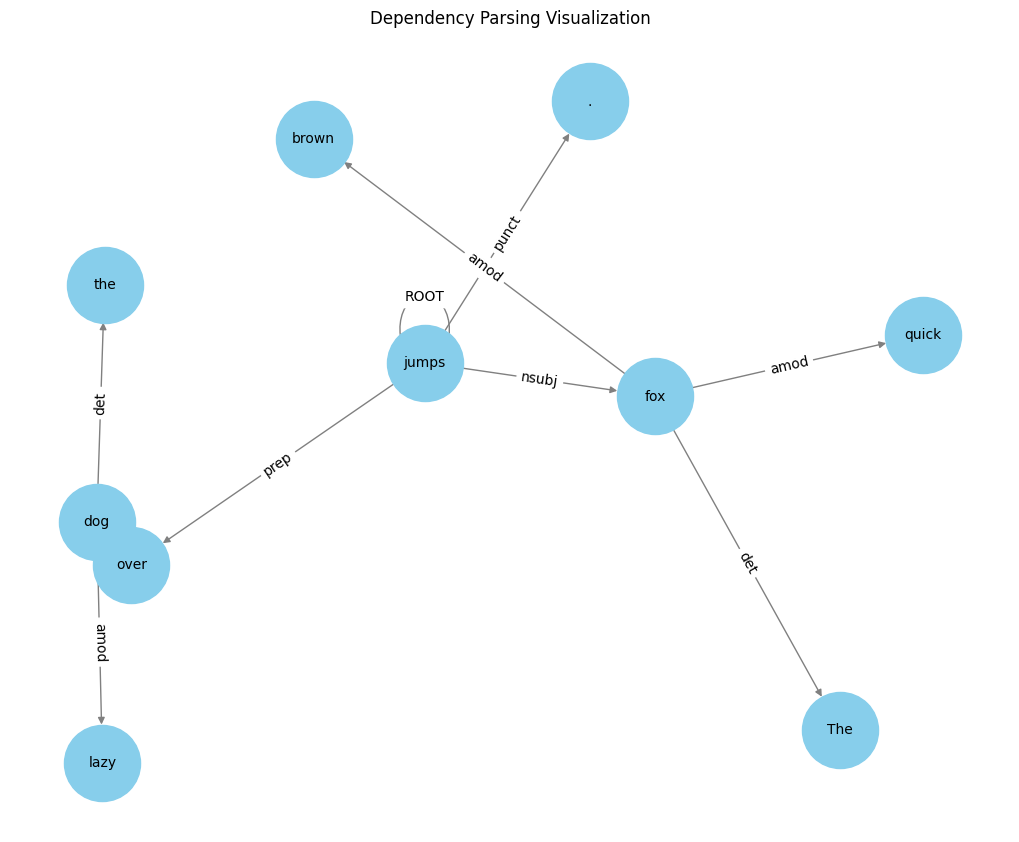

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Your sample text
text = "The quick brown fox jumps over the lazy dog."

# Process the text
doc = nlp(text)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on dependency parsing
for token in doc:
    G.add_node(token.text)
    G.add_edge(token.head.text, token.text, label=token.dep_)

# Plotting the dependency parse
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_color='black', edge_color='gray', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Dependency Parsing Visualization')
plt.show()


In [ ]:
import spacy
from spacy import displacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define input text
input_text = "Albert Einstein was born in Ulm, in the Kingdom of Württemberg in the German Empire, on 14 March 1879."

# Process the input text
doc = nlp(input_text)

# Visualize the dependency parsing tree
displacy.render(doc, style="dep", options={"compact": True})

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="fa97432a49e540ffb72134c5032b40de-0" class="displacy" width="2900" height="437.0" direction="ltr" style="max-width: none; height: 437.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="347.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Albert</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="347.0">\n    <tspan class="displacy-word" fill="currentColor" x="200">Einstein</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="200">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="347.0">\n    <tspan class="displacy-word" fill="currentColor" x="350">was</tspan>\n    <tspan class="dis

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from nltk import pos_tag, RegexpParser
from nltk.tokenize import word_tokenize

# Sample sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Perform POS tagging
tagged_tokens = pos_tag(tokens)

# Define a simple grammar for NP (noun phrase) and VP (verb phrase)
grammar = r"""
  NP: {<DT>?<JJ>*<NN>}    # Noun Phrase
  VP: {<VB.*><DT>?<JJ>*<NN>*}  # Verb Phrase
"""

# Create a parser based on the defined grammar
parser = RegexpParser(grammar)

# Parse the tagged tokens to get the parse tree
parse_tree = parser.parse(tagged_tokens)

# Display the parse tree
print(parse_tree)


(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  (VP jumps/VBZ)
  over/IN
  (NP the/DT lazy/JJ dog/NN)
  ./.)


In [ ]:
import string
from nltk.corpus import stopwords
import nltk
import spacy
from spacy import displacy

In [ ]:
stoplist = list(string.punctuation)
stoplist += ['-lrb-', '-rrb-', '-lcb-', '-rcb-', '-lsb-', '-rsb-']
stoplist += stopwords.words('english')

In [ ]:
def preprocess_and_parse(input_text):
    # Tokenize the input text using SpaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(input_text)

    # Filter out tokens based on the stoplist
    filtered_tokens = [token.text.lower() for token in doc if token.text.lower() not in stoplist]

    # Join filtered tokens back into a processed text string
    processed_text = ' '.join(filtered_tokens)

    # Perform POS tagging and dependency parsing on the processed text using SpaCy
    parsed_doc = nlp(processed_text)

    return parsed_doc

# Example input paragraph
input_paragraph = "Natural language processing (NLP) is a field of artificial intelligence. It focuses on the interaction between computers and humans using natural language. NLP involves text analysis, parsing, and understanding."

# Preprocess and parse the input paragraph
parsed_doc = preprocess_and_parse(input_paragraph)

# Display POS tagging and dependency parsing results using SpaCy's visualization
displacy.render(parsed_doc, style='dep', jupyter=True)

# Output POS tagging and dependency parsing results
for token in parsed_doc:
    print(f"Token: {token.text}\t\tPOS Tag: {token.pos_}\t\tDependency: {token.dep_}")


Token: natural		POS Tag: ADJ		Dependency: amod
Token: language		POS Tag: NOUN		Dependency: compound
Token: processing		POS Tag: NOUN		Dependency: nmod
Token: nlp		POS Tag: NOUN		Dependency: nmod
Token: field		POS Tag: NOUN		Dependency: nmod
Token: artificial		POS Tag: ADJ		Dependency: amod
Token: intelligence		POS Tag: NOUN		Dependency: nsubj
Token: focuses		POS Tag: VERB		Dependency: ROOT
Token: interaction		POS Tag: NOUN		Dependency: compound
Token: computers		POS Tag: NOUN		Dependency: compound
Token: humans		POS Tag: NOUN		Dependency: nsubj
Token: using		POS Tag: VERB		Dependency: acl
Token: natural		POS Tag: ADJ		Dependency: amod
Token: language		POS Tag: NOUN		Dependency: compound
Token: nlp		POS Tag: NOUN		Dependency: dobj
Token: involves		POS Tag: VERB		Dependency: ccomp
Token: text		POS Tag: NOUN		Dependency: compound
Token: analysis		POS Tag: NOUN		Dependency: dobj
Token: parsing		POS Tag: VERB		Dependency: acl
Token: understanding		POS Tag: NOUN		Dependency: dobj


In [ ]:
pip install coreferee


In [ ]:
import spacy
import coreferee

npl = spacy.load('en_core_web_sm')
nlp.add_pipe('coreferee')

✘ Please load the Coreferee models for language 'en' with the command
'python -m coreferee install en'.


ModelNotSupportedError: Please load the Coreferee models for language 'en' with the command 'python -m coreferee install en'.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [ ]:
!pip install allennlp==2.10.1
!pip install allennlp-models==2.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 28.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 28.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of cached-path to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 36.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of cached-path to determine which version is compatible with other requirements. This could take a while.
     ━

In [ ]:
from allennlp_models.pretrained import load_predictor
predictor = load_predictor("structured-prediction-constituency-parser")

In [ ]:
test_sentence = "The old woman was sitting under a tree and sipping coffee."
test_sentence = test_sentence.rstrip('?:!.,;')
print (test_sentence)
parser_output = predictor.predict(sentence=test_sentence)
print (parser_output)

The old woman was sitting under a tree and sipping coffee
{'class_probabilities': [[1.0, 2.4588861502472525e-10, 2.1394394180649376e-15, 7.15118068927989e-15, 5.8470307419302824e-15, 3.5537555970882595e-12, 7.540834140928529e-14, 4.139092280724954e-12, 6.529108503849912e-11, 2.980002963143269e-12, 7.46236534750807e-15, 2.474742958301357e-13, 1.9076340507240275e-09, 5.629304395673648e-14, 1.93989529301275e-11, 1.403551862406982e-12, 8.544163640489266e-15, 6.831294210862815e-12, 3.640286422995631e-12, 2.1091670619234615e-13, 3.5311074810667753e-12, 1.285351824975578e-10, 9.77820380221317e-10, 4.2513724745479875e-13, 9.261171609329169e-14, 1.1272043411517108e-13, 8.263592175990209e-13, 3.677602059687368e-12, 2.505332028532141e-14, 6.612998451789587e-13, 1.9244574683829896e-11, 4.778365203517154e-11, 2.3269067228604e-11, 4.788898769723937e-13, 9.899396840457042e-13, 1.4939769907296174e-11, 4.716956534568661e-13, 8.795373825955244e-13, 3.4811134010104272e-12, 8.037816939809872e-12, 1.256742

In [ ]:
tree_string = parser_output["trees"]
print (tree_string)

(S (NP (DT The) (JJ old) (NN woman)) (VP (VBD was) (VP (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree)))) (CC and) (VP (VBG sipping) (NP (NN coffee))))))


In [ ]:
from nltk import tokenize
from nltk.tree import Tree

tree = Tree.fromstring(tree_string)
print (tree)
print (tree.pretty_print())

(S
  (NP (DT The) (JJ old) (NN woman))
  (VP
    (VBD was)
    (VP
      (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree))))
      (CC and)
      (VP (VBG sipping) (NP (NN coffee))))))
                            S                                          
      ______________________|________                                   
     |                               VP                                
     |          _____________________|_______                           
     |         |                             VP                        
     |         |                  ___________|________________          
     |         |                 VP               |           |        
     |         |      ___________|___             |           |         
     |         |     |               PP           |           VP       
     |         |     |       ________|___         |      _____|____     
     NP        |     |      |            NP       |     |          NP  
  ___|____   

In [ ]:
import spacy
from allennlp.predictors.predictor import Predictor

# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Add 'tok2vec' component to the spaCy pipeline if not already added
if 'tok2vec' not in nlp.pipe_names:
    tok2vec = nlp.add_pipe('tok2vec')

# Load the AllenNLP coreference resolution predictor
model_url = "https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2020.02.27.tar.gz"
predictor = Predictor.from_path(model_url)

# Example input text for coreference resolution
input_text = "Elon Musk is a visionary entrepreneur known for founding SpaceX and Tesla. \
He was born in South Africa and later moved to the United States. Musk is also involved in \
advancing renewable energy technologies."

# Perform coreference resolution using the AllenNLP predictor
prediction = predictor.predict(document=input_text)

# Display resolved coreference clusters
print("Coreference Clusters:")
for cluster in prediction['clusters']:
    print(cluster)

print('\n')  # Print newline for clarity

# Display coreference-resolved text
resolved_text = predictor.coref_resolved(input_text)
print("Coreference Resolved Text:")
print(resolved_text)


Clusters:-
[[0, 3], [27, 27]]
[[35, 35], [52, 52]]



Coref resolved:  Joseph Robinette Biden Jr. is an American politician who is the 46th and current president of the United States. A member of the Democratic Party, Joseph Robinette Biden Jr. served as the 47th vice president from 2009 to 2017 under Barack Obama and represented Delaware in the United States Senate from 1973 to 2009.
